In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
## Load the data
movie_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRzwOVZswzLMacwVwQJLB4WnDZIy46gxMxZzGtJs0FKCLhwXDb8kUI1wmo9-Nll0oo1EpgjFbBoUEV/pub?output=csv"
df = pd.read_csv(movie_url,index_col=0,parse_dates=['release_date'])
## Filter out movie population of interest and remove nulls
## keeping only movies released after 2000 and before 2020
df = df[(df['release_date'] > "2000") & (df['release_date'] <"2020")]
df = df.dropna(subset=['runtime'])
df.head(3)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


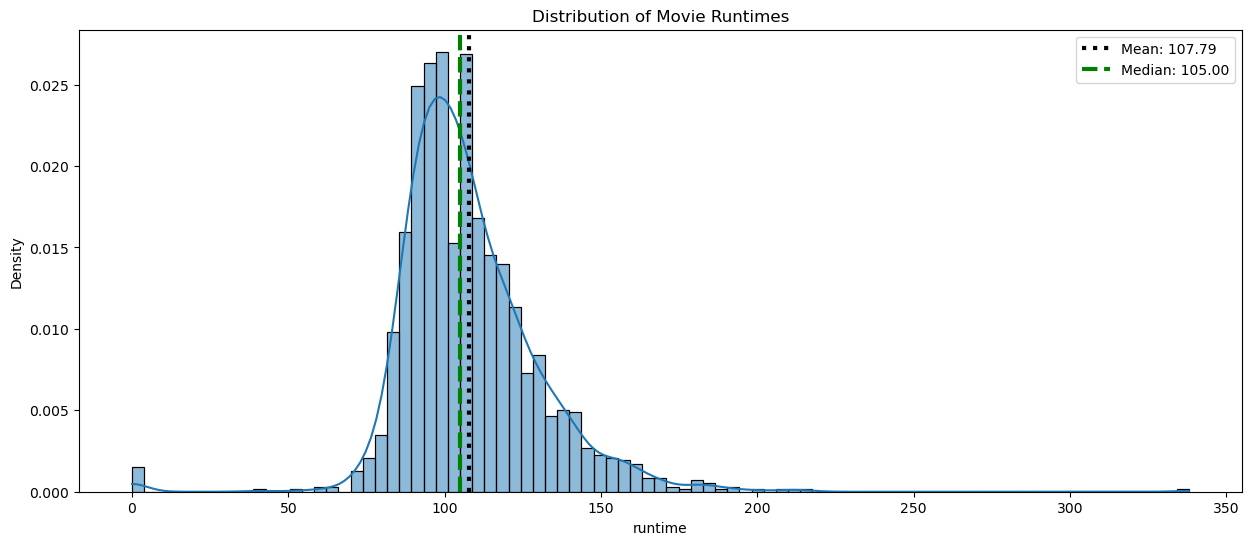

In [4]:
## Slice out data and calc stats
data = df['runtime'].copy()
mean = np.mean(data)
med = np.median(data)
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=data, kde=True, ax=ax, stat='density')
ax.set_title('Distribution of Movie Runtimes')
## Annotate mean and median
ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}")
ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}")
ax.legend()

In [5]:
# note that data was previously defined as 
# data = df['runtime'].copy()
result = stats.normaltest(data)
print(result)
# Is the p-value less than 0.05?
result.pvalue < .05

NormaltestResult(statistic=498.6206359702571, pvalue=5.319914071356255e-109)


True

In [6]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
## Filtering out males and females to separate variables
males = df.loc[df['Gender']=='Male'].copy()
females = df.loc[df['Gender']=='Female'].copy()

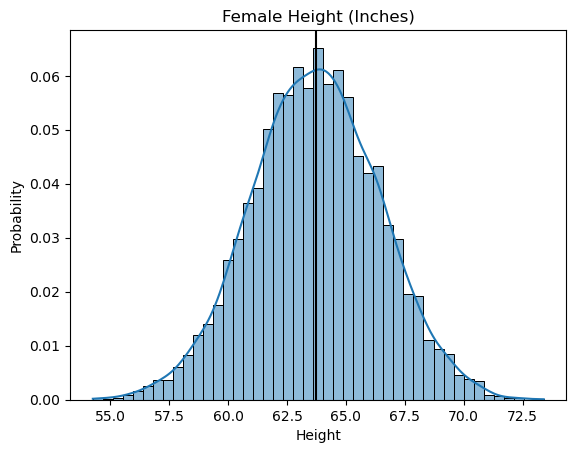

In [7]:
ax = sns.histplot(x=females['Height'],stat='probability',kde=True)
ax.axvline(females['Height'].mean(), color='k')
ax.set_title("Female Height (Inches)");

In [8]:
result = stats.normaltest(females['Height'])
print(result)
# is the p-value less than 0.05?
result.pvalue < .05

NormaltestResult(statistic=0.921020536662115, pvalue=0.6309616036255834)


False